In [6]:
import numpy as np
import pandas as pd
# from DeepQI_preprocessing import get_slicemax
import SimpleITK as sitk
import os

In [8]:
def get_slicemax(Image,Mask,output_dir):
    print(''*30)
    print('Starting to get maximal area slice')
    #convert image to array
    mask_array = sitk.GetArrayFromImage(Mask)
    image_array  = sitk.GetArrayFromImage(Image)
    # find the index of slice with maximum pixel number
    pixelsum = []
    for i in range(mask_array.shape[0]):
        pixelnum = np.sum(mask_array[i,:,:])
        pixelsum.append(pixelnum)
    ind_max = pixelsum.index(max(pixelsum))
    oneslice = image_array[ind_max,:,:]
    #gray level
    oneslice = (oneslice-np.min(oneslice))*255/(np.max(oneslice)-np.min(oneslice))
    # filter the max slice using mask
    oneslice = oneslice*mask_array[ind_max,:,:]
    # save max slice
#     fig_name = ptid + '-' + roi +'-' + 'slicemax'+ str(mask_array.shape[0]-ind_max)
    fig_name = 'slicemax'+ str(mask_array.shape[0]-ind_max)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    np.save(output_dir+fig_name,oneslice)
    # plt.imsave((output_dir+ fig_name+'.png'),oneslice)
#     print('All DL input image of patient %s have been done !!!' % ptid)

In [9]:
im1 = 'data/lung1_image.nrrd'
mask1 = 'data/lung1_label.nrrd'
output_dir = './'

IMAGE = sitk.ReadImage(im1)
MASK = sitk.ReadImage(mask1)
get_slicemax(IMAGE,MASK,output_dir)


Starting to get maximal area slice


In [12]:
import matplotlib.pyplot as plt
s = np.load('./slicemax15.npy')
plt.imshow(s, cmap='gray')
plt.show()

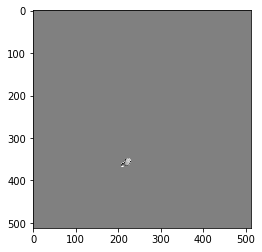